# An introduction to GeoPandas

Welcome to Jupyter Notebook, this is an example of a Python notebook. A quick overview of how notebooks work can be [found here](https://medium.com/codingthesmartway-com-blog/getting-started-with-jupyter-notebook-for-python-4e7082bd5d46#6f0c).

Coming Up: 

#### 0.5 Where are we?

#### 1.0 What is [Pandas](https://towardsdatascience.com/a-quick-introduction-to-the-pandas-python-library-f1b678f34673)?

#### 2.0 What is a [GeoPanda](http://geopandas.org/)?

In [1]:
import json, shapely, fiona, os
import seaborn as sns
import pandas as pd
import geopandas as gpd
import networkx as nx

import matplotlib.pyplot as plt

%matplotlib inline

# 1. Create a dataframe with Pandas

In [2]:
# load the sample dataset (iris)
iris = sns.load_dataset('iris')

#look at it:
print("Rows: ",len(iris))
iris.head()

Rows:  150


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.species.value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

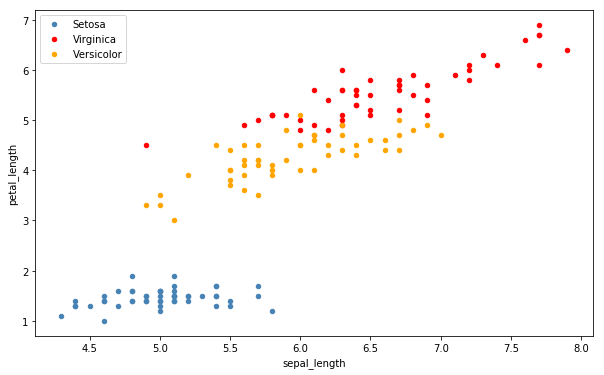

In [4]:
#Now let's plot it: 
ax = iris[iris.species=='setosa'].plot(kind='scatter', x='sepal_length', y='petal_length', color='steelblue', figsize=(10,6))
iris[iris.species=='virginica'].plot(kind='scatter', x='sepal_length', y='petal_length', ax=ax, color='red')
iris[iris.species=='versicolor'].plot(kind='scatter', x='sepal_length', y='petal_length', ax=ax, color='orange')
ax.legend(['Setosa','Virginica','Versicolor'])

# 2. GeoPandas: Okay, Let's Go Geo! 

In [5]:
# First we're going to read in the default data
path = gpd.datasets.get_path('naturalearth_lowres')
df = gpd.read_file(path)
df.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,..."
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,..."
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,..."
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...


In [6]:
print("Average Population per country: {0}".format(df.pop_est.mean().round()))
print("Median Population per country:  {0}".format(df.pop_est.median().round()))

Average Population per country: 38273988.0
Median Population per country:  9035536.0


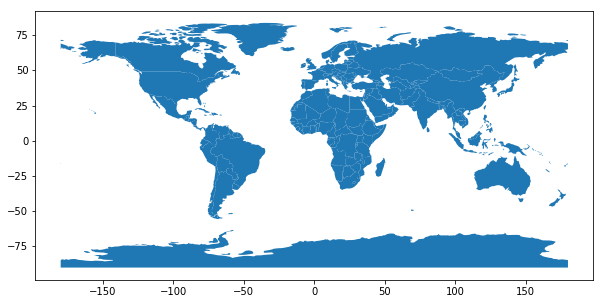

In [7]:
#Now let's plot it
df.plot(figsize=(10,8))

In [8]:
# Get fancier with other libraries

In [9]:
import geoplot

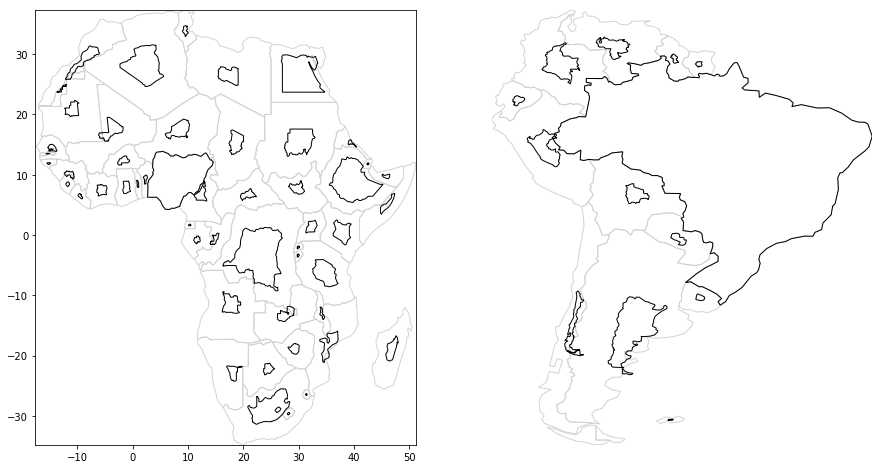

In [10]:
fig, axes = plt.subplots(1,2)
fig.set_size_inches(15,8)
geoplot.cartogram(df[df['continent'] == 'Africa'],
                  scale='pop_est', limits=(0.2, 1), figsize=(7, 8), ax=axes[0])
geoplot.cartogram(df[df['continent'] == 'South America'],
                  scale='pop_est', limits=(0.2, 1), figsize=(7, 8), ax=axes[1])

# 3 Cities?

In [11]:
df = gpd.read_file('data/HydrologyLine.shp')
df.columns = ['layer','length','geometry']
df.head()

,layer,length,geometry
0,LATERAL,675.354924,LINESTRING (3093363.249963984 1260871.99988813...
1,LATERAL,10.377991,LINESTRING (3076934.500013143 1232586.37502904...
2,LATERAL,792.953227,LINESTRING (3081484.50009948 1236880.999969959...
3,CREEK-INT,484.910450,LINESTRING (3062339.000004724 1236013.87506379...
4,LATERAL,293.233744,LINESTRING (3090070.999986812 1260398.87517821...


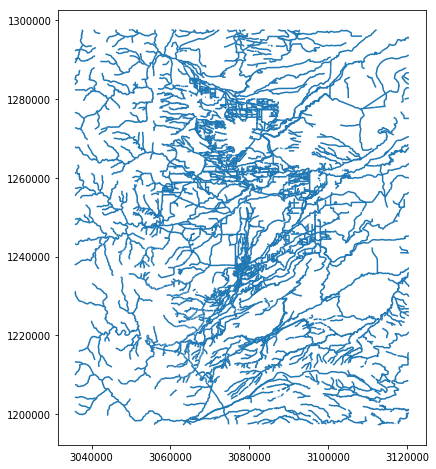

In [12]:
df.plot(figsize=(15,8))

In [13]:
df.crs

{'init': 'epsg:2876'}

In [14]:
mercator = df.head(10).to_crs({'init': 'epsg:4326'})

# Let's compare some data?

In [15]:
osmp_lands = gpd.read_file('data/OSMPLands.shp')
osmp_lands.head(3)

,AcqID,PropertyID,TYPE,NAME,YEARCLOSE,JOINTPURCH,PUBLICACCE,lbl_Acres,Acres,Manager,...,WhyNoAcces,Hectares,S,T,R,TSA,PolyID,Shape_area,Shape_len,geometry
0,933,1466,Fee Property,WALDORF,2002,n,n,74,74.395579,OSMP,...,New Property,30.106822,5,2N,70W,NTSA,1,3.240658e+06,7908.705573,"POLYGON ((3069393.105175942 1305111.048324451,..."
1,886,1467,Fee Property,OASIS DIRECT SEVEN,2001,n,n,71,71.330724,OSMP,...,New Property,28.866520,2,2N,70W,NTSA,2,3.107154e+06,7998.047884,"POLYGON ((3085937.88612923 1305140.297288895, ..."
2,867,1468,Conservation Easement,LOPEZ Ce,2002,y,n,83,83.489831,Private,...,Conservation Easement,33.787136,2,2N,70W,NTSA,3,3.636802e+06,13253.526495,"POLYGON ((3075350.977093384 1305074.861522555,..."


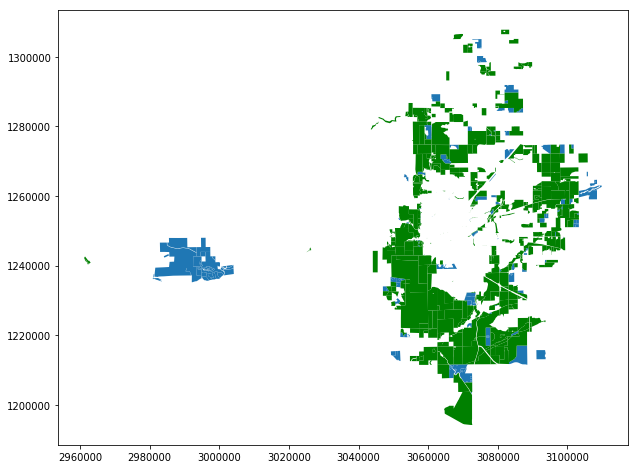

In [16]:
ax = osmp_lands[osmp_lands.TYPE=='Conservation Easement'].plot(figsize=(15,8))
osmp_lands[osmp_lands.TYPE!='Conservation Easement'].plot(ax=ax,color='green')

# geoplot.choropleth(osmp_lands, hue='PropertyID', cmap='Greens', figsize=(8, 4))

# Crime?

In [31]:
crime = gpd.read_file('data/Target_Crime_Locations.shp')
crime['date'] = crime.REPORTDATE.apply(lambda x: pd.Timestamp(x).date())
crime['year'] = crime.date.apply(lambda x: x.year)
crime.head()

,OBJECTID,REPORTNUM,REPORTDATE,BLOCKADD,OFFENSE,geometry,date,year
0,14950943,100005879,2010-05-10T07:00:00.000Z,19th St & Iris Ave,Vandalism,POINT (-105.2726935563568 40.03641117906543),2010-05-10,2010
1,14950944,080016839,2008-12-15T07:00:00.000Z,2900 Block Glenwood Dr,Burglary,POINT (-105.2551157859522 40.03282370060626),2008-12-15,2008
2,14950945,170003203,2017-03-16T07:00:00.000Z,1900 Block 29th St,Sex Assault,POINT (-105.2562485089662 40.01971060892392),2017-03-16,2017
3,14950946,120006765,2012-05-19T07:00:00.000Z,800 Block 11th St,Robbery,POINT (-105.2786508425686 40.00278002872848),2012-05-19,2012
4,14950947,080007937,2008-06-14T07:00:00.000Z,900 Block 30th St,Vandalism,POINT (-105.253104060112 40.00445429499652),2008-06-14,2008


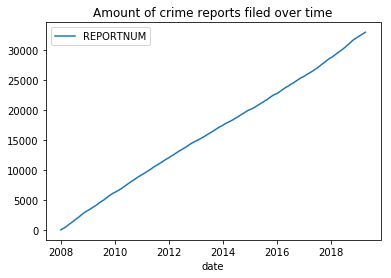

In [32]:
ax = crime.groupby('date').aggregate({"REPORTNUM":"count"}).cumsum().plot()
ax.set_title("Amount of crime reports filed over time");

In [33]:
# Looks like crime is not going up in Boulder?
crime.OFFENSE.value_counts()

Vandalism             9100
Burglary              6080
Theft From Vehicle    5271
Trespassing           5038
Incident              2375
Auto Theft            1368
Assault               1245
Sex Assault           1026
Robbery                446
Indecent Exposure      284
Motorcycle Theft       277
Recovery               252
Theft Of Car Parts     225
Indecency               41
Homicide                20
Name: OFFENSE, dtype: int64

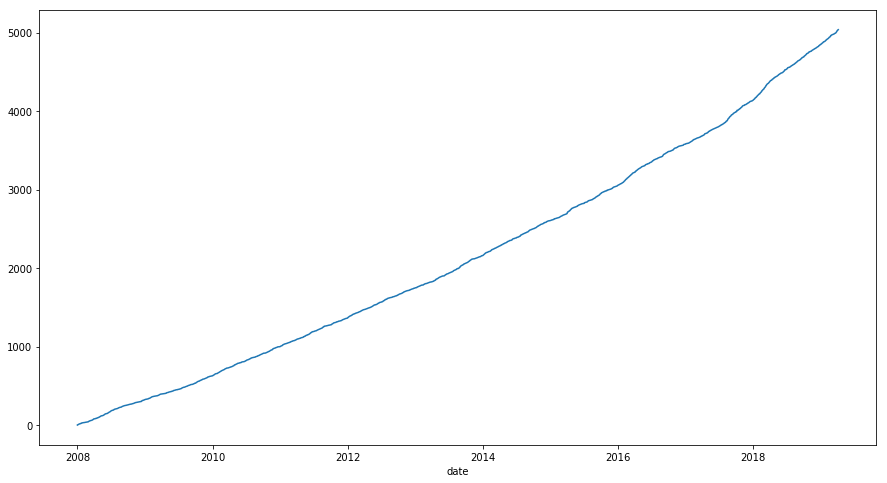

In [34]:
crime[crime.OFFENSE=='Trespassing'].groupby('date').aggregate('count')['OBJECTID'].cumsum().plot(figsize=(15,8))

In [44]:
conservation_easement = osmp_lands[osmp_lands.TYPE=='Conservation Easement'].to_crs(crime.crs)

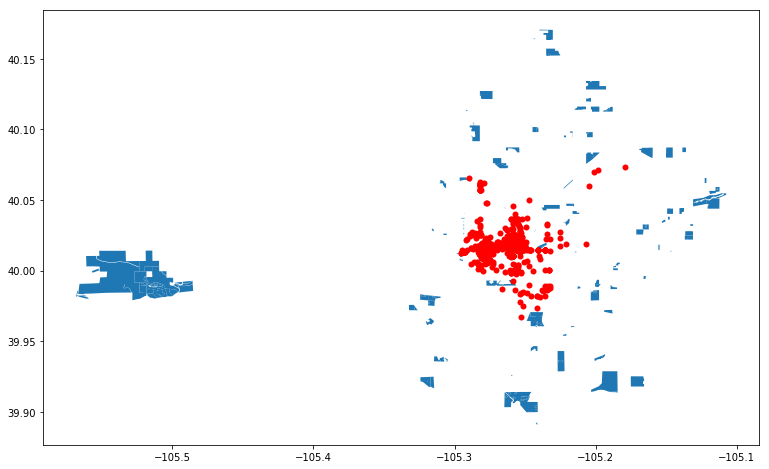

In [46]:
ax = conservation_easement.plot(figsize=(15,8))
crime[(crime.OFFENSE=='Trespassing') & (crime.year==2018)].plot(ax=ax, color='red', linewidth=0.01)

In [105]:
crimes_on_osmplands = gpd.sjoin(osmp_lands.to_crs(crime.crs),crime) #Spatial join Points to polygons
crimes_on_osmplands.head(2)

,AcqID,PropertyID,TYPE,NAME,YEARCLOSE,JOINTPURCH,PUBLICACCE,lbl_Acres,Acres,Manager,...,Shape_len,geometry,index_right,OBJECTID,REPORTNUM,REPORTDATE,BLOCKADD,OFFENSE,date,year
53,73,1526,Fee Property,GREENS INDUSTRIAL PARK,1979,n,y,5,5.437651,OSMP,...,5209.42008,"POLYGON ((-105.201588050469 40.07617338188011,...",9217,14960160,080002654,2008-02-28T07:00:00.000Z,6700 Block Lookout Rd,Vandalism,2008-02-28,2008
53,73,1526,Fee Property,GREENS INDUSTRIAL PARK,1979,n,y,5,5.437651,OSMP,...,5209.42008,"POLYGON ((-105.201588050469 40.07617338188011,...",18026,14967969,140010564,2014-08-22T07:00:00.000Z,6700 Block Lookout Rd,Burglary,2014-08-22,2014


In [108]:
# What crimes happpen on OSMP lands?
crimes_on_osmplands.OFFENSE.value_counts()

Vandalism             10
Theft From Vehicle     9
Burglary               5
Trespassing            1
Recovery               1
Homicide               1
Sex Assault            1
Auto Theft             1
Robbery                1
Name: OFFENSE, dtype: int64

<br><br><hr><br><br>
# Prairie Dogs?

In [82]:
prairie = gpd.read_file('data/prairies.shp')
print("Found {0} colonies".format(len(prairie)))
prairie.head()

Found 1939 colonies


,PD_ID,Comment,Year,Name,Acres,Hectares,Plague,Manager,Perimeter,Activity,YearAcquir,sdeWildlif,Shape_area,Shape_len,geometry
0,126.0,None,2009.0,Brewbaker,30.013797,12.146153,None,OSMP,17407.132776,2.0,1996,1.307396e+06,1.307396e+06,17407.132776,(POLYGON ((-105.2551049746035 40.1107786117787...
1,26.0,None,2009.0,Cowles,5.450247,2.205637,None,OSMP,2875.475502,2.0,1991,2.374118e+05,2.374118e+05,2875.475502,POLYGON ((-105.2125947902807 40.09369161960398...
2,136.0,None,2009.0,Sams Lane/Van Vleet - west,6.346785,2.568453,None,OSMP,4246.332172,2.0,1978,2.764648e+05,2.764648e+05,4246.332172,(POLYGON ((-105.2230299787233 39.9701249045225...
3,68.0,None,2009.0,Marshall,47.677422,19.294368,None,OSMP,10818.604923,2.0,1997,2.076820e+06,2.076820e+06,10818.604923,(POLYGON ((-105.1853971869327 39.9896294967005...
4,38.0,None,2009.0,ERNI- Moore,16.960038,6.863484,None,OSMP,5580.871249,2.0,1967,7.387763e+05,7.387763e+05,5580.871249,"POLYGON ((-105.293482928868 40.05715147484449,..."


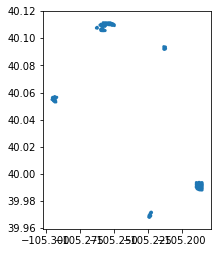

In [93]:
prairie.head().buffer(0.001).plot()